In [2]:
import pandas as pd

import pyodbc
server = 'orangemainsql.database.windows.net'
database = 'Main_SQL'
username = 'gauthier'
password = 'Supermotdepasse!42'
driver= '{SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

## actors

In [3]:
query = "SELECT * FROM analysis_actors"
df_actors = pd.read_sql(query, cnxn)
df_actors.head()
# df_actors.describe()

,id,first_name,last_name,gender,film_count
0,933,Lewis,Abernathy,M,1
1,2547,Andrew,Adamson,M,1
2,2700,William,Addy,M,1
3,2898,Seth (I),Adkins,M,1
4,2925,Charles (I),Adler,M,1


## directors

In [4]:
query = "SELECT * FROM analysis_directors"
df_directors = pd.read_sql(query, cnxn)
df_directors.head()

,id,first_name,last_name
0,429,Andrew,Adamson
1,2931,Darren,Aronofsky
2,9247,Zach,Braff
3,11652,James (I),Cameron
4,14927,Ron,Clements


## genres

In [5]:
query = "SELECT * FROM analysis_directors_genres"
df_directors_genres = pd.read_sql(query, cnxn)
df_directors_genres.head()

,director_id,genre,prob
0,429,Adventure,0.75
1,429,Music,0.25
2,429,Fantasy,0.75
3,429,Romance,0.50
4,429,Family,0.75


## movies

In [6]:
query = "SELECT * FROM analysis_movies"
df_movies = pd.read_sql(query, cnxn)
df_movies.head()

,id,name,year,rank
0,10920,Aliens,1986,8.2
1,17173,Animal House,1978,7.5
2,18979,Apollo 13,1995,7.5
3,30959,Batman Begins,2005,NaN
4,46169,Braveheart,1995,8.3


## movies_directors

In [7]:
query = "SELECT * FROM analysis_movies_directors"
df_movies_directors = pd.read_sql(query, cnxn)
df_movies_directors.head()

,director_id,movie_id
0,429,300229
1,2931,254943
2,9247,124110
3,11652,10920
4,11652,333856


## movies_genres

In [8]:
query = "SELECT * FROM analysis_movies_genres"
df_movies_genres = pd.read_sql(query, cnxn)
df_movies_genres.head()

,movie_id,genre
0,10920,Action
1,10920,Horror
2,10920,Sci-Fi
3,10920,Thriller
4,17173,Comedy


## roles

In [9]:
query = "SELECT * FROM analysis_roles"
df_roles = pd.read_sql(query, cnxn)
df_roles.head()

,actor_id,movie_id,role
0,933,333856,Lewis Bodine
1,2547,300229,Duloc Mascot
2,2700,306032,Tyrone
3,2898,333856,Slovakian three-year-old boy
4,2925,192017,Additional Voices


## search 1

In [45]:
 query = """
    SELECT id_movie, movie_name, year, rank, d_last_name, d_first_name, genre, role, first_name AS a_first_name, last_name AS a_last_name, gender FROM (
        SELECT m.id as id_movie, m.name as movie_name, m.year, m.rank, md.director_id, md.movie_id, d.last_name as d_last_name, d.first_name as d_first_name
        FROM analysis_movies m 
        JOIN analysis_movies_directors md
        ON m.id = md.movie_id
        JOIN analysis_directors d ON CAST(d.id AS CHAR) = CAST (md.director_id AS CHAR)
    ) AS sub
    JOIN 
        analysis_movies_genres mg on sub.movie_id = mg.movie_id
    JOIN 
        analysis_roles r on r.movie_id = mg.movie_id
    JOIN 
        analysis_actors a on r.actor_id = a.id
     ORDER BY rank DESC
    ;"""

df_movies = pd.read_sql(query, cnxn)
df_movies.head()

,id_movie,movie_name,year,rank,d_last_name,d_first_name,genre,role,a_first_name,a_last_name,gender
0,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Haig (head bull),Dion,Anderson,M
1,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Con,James,Babson,M
2,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Youngblood (guard),Ned,Bellamy,M
3,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,"Tommy Williams, Inmate 46419",Gil,Bellows,M
4,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford,Crime,Ottilio Cuneo,Rudy,Bond,M


In [34]:
query = """
        SELECT m.id as id_movie,m.name as movie_name,m.year,m.rank, d.last_name, d.first_name
        FROM analysis_movies m 
        JOIN analysis_movies_directors md
        ON m.id = md.movie_id
        JOIN analysis_directors d ON CAST(d.id AS CHAR) = CAST (md.director_id AS CHAR)
        ORDER BY rank DESC
    """
df_movies_directors = pd.read_sql(query, cnxn)
df_movies_directors.head(20)
  


,id_movie,movie_name,year,rank,last_name,first_name
0,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford
1,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank
2,313459,Star Wars,1977,8.8,Lucas,George
3,210511,Memento,2000,8.7,Nolan,Christopher
4,267038,Pulp Fiction,1994,8.7,Tarantino,Quentin
5,207992,"Matrix, The",1999,8.5,Wachowski,Andy
6,207992,"Matrix, The",1999,8.5,Wachowski,Larry
7,112290,Fight Club,1999,8.5,Fincher,David
8,176711,Kill Bill: Vol. 1,2003,8.4,Tarantino,Quentin
9,124110,Garden State,2004,8.3,Braff,Zach


Par genre

In [41]:
query ="""SELECT * 
                FROM analysis_movies_genres  mg
                JOIN analysis_movies  m
                ON mg.movie_id = m.id;"""
df_movies_rank_genre = pd.read_sql(query, cnxn)
df_movies_rank_genre.head(20)
  


,movie_id,genre,id,name,year,rank
0,10920,Action,10920,Aliens,1986,8.2
1,10920,Horror,10920,Aliens,1986,8.2
2,10920,Sci-Fi,10920,Aliens,1986,8.2
3,10920,Thriller,10920,Aliens,1986,8.2
4,17173,Comedy,17173,Animal House,1978,7.5
5,18979,Drama,18979,Apollo 13,1995,7.5
6,30959,Action,30959,Batman Begins,2005,NaN
7,30959,Adventure,30959,Batman Begins,2005,NaN
8,30959,Crime,30959,Batman Begins,2005,NaN
9,30959,Fantasy,30959,Batman Begins,2005,NaN


Faire une View

In [47]:
cursor= cnxn.cursor()
cursor.execute( """CREATE VIEW ff_movies1 AS
     SELECT id_movie, movie_name, year, rank, d_last_name, d_first_name, genre, role, first_name AS a_first_name, last_name AS a_last_name, gender FROM (
        SELECT m.id as id_movie, m.name as movie_name, m.year, m.rank, md.director_id, md.movie_id, d.last_name as d_last_name, d.first_name as d_first_name
        FROM analysis_movies m 
        JOIN analysis_movies_directors md
        ON m.id = md.movie_id
        JOIN analysis_directors d ON CAST(d.id AS CHAR) = CAST (md.director_id AS CHAR)
        ) AS sub
        JOIN 
            analysis_movies_genres mg on sub.movie_id = mg.movie_id
        JOIN 
            analysis_roles r on r.movie_id = mg.movie_id
        JOIN 
            analysis_actors a on r.actor_id = a.id
         
        ;""")

cnxn.commit()

In [49]:
query = """
SELECT * FROM ff_movies1
ORDER BY rank DESC;"""
df_ff_movies = pd.read_sql(query, cnxn)
df_ff_movies.head(20)
  

,id_movie,movie_name,year,rank,d_last_name,d_first_name,genre,role,a_first_name,a_last_name,gender
0,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Haig (head bull),Dion,Anderson,M
1,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Con,James,Babson,M
2,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Youngblood (guard),Ned,Bellamy,M
3,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,"Tommy Williams, Inmate 46419",Gil,Bellows,M
4,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford,Crime,Ottilio Cuneo,Rudy,Bond,M
5,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford,Drama,Ottilio Cuneo,Rudy,Bond,M
6,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Elmo Blatch,Bill,Bolender,M
7,297838,"Shawshank Redemption, The",1994,9.0,Darabont,Frank,Drama,Skeet,Larry,Brandenburg,M
8,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford,Crime,Don Vito Corleone,Marlon,Brando,M
9,130128,"Godfather, The",1972,9.0,Coppola,Francis Ford,Drama,Don Vito Corleone,Marlon,Brando,M


In [54]:
query = """
SELECT 
COUNT(*) AS nbr_films, CAST(genre AS CHAR) AS genre, AVG(rank) AS AVG_rank
FROM ff_movies
GROUP BY CAST (genre AS char )
ORDER BY nbr_films DESC;"""
df_genre_ff = pd.read_sql(query, cnxn)
df_genre_ff.head(20)
  

,nbr_films,genre,AVG_rank
0,1195,Drama,7.848368
1,1006,Thriller,7.830191
2,922,Crime,8.060814
3,647,Comedy,7.594745
4,446,Mystery,7.731839
5,432,Action,8.472162
6,370,Romance,7.269189
7,339,Sci-Fi,7.888201
8,327,Adventure,8.268504
9,295,Fantasy,8.182883


Visualisation

In [57]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [71]:
df_genre_ff_rank = df_genre_ff.drop('nbr_films', axis = 1)

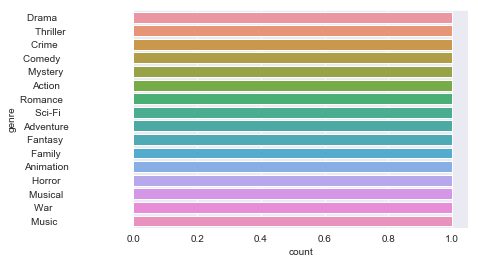

In [73]:
sns.countplot(y ='genre', data = df_genre_ff_rank, hue )
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001001B518>]],
      dtype=object)

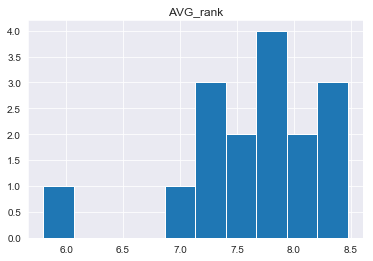

In [76]:
df_genre_ff_rank.hist(column='AVG_rank')



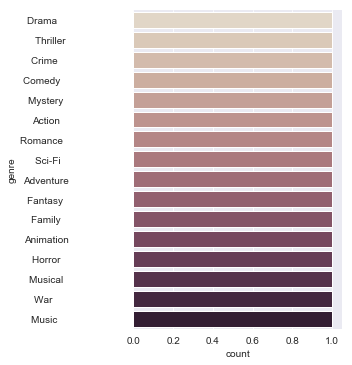

In [82]:
sns.catplot(y="genre", kind="count", palette="ch:.25", data=df_genre_ff_rank)
